In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from models.single_layer_perceptron import SingleLayerPerceptron

In [50]:
ticker = 'B3SA3.SA'
prices = yf.Ticker(ticker).history('max')
prices = prices.drop(['Volume', 'Dividends', 'Stock Splits'], 1)
prices.to_csv('prices.csv')

# prices = pd.read_csv('prices.csv').set_index('Date')
prices.head()

In [51]:
y = prices.Close.shift(-1)
prices['y'] = y

In [52]:
prices.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [53]:
prices['SMA_5'] = prices.ta.sma(5)
prices['SMA_30'] = prices.ta.sma(30)
prices['SMA_60'] = prices.ta.sma(60)
prices['SMA_180'] = prices.ta.sma(180)
prices['RSI_5'] = prices.ta.rsi(5)
prices['RSI_30'] = prices.ta.rsi(30)
prices['RSI_60'] = prices.ta.rsi(60)
prices['RSI_180'] = prices.ta.rsi(180)
prices = pd.concat([prices, ta.donchian(prices["High"], prices["Low"], lower_length=10, upper_length=15)], 1)
prices =  prices.dropna()

columns = list(prices.columns)
columns.remove('y')

In [54]:
trading_threshold = '2021-10-31'
prices.index = pd.to_datetime(prices.index)
train_prices = prices[(prices.index <= trading_threshold) & (prices.index.year >= 2016)]
test_prices = prices[prices.index > trading_threshold]

In [55]:
train_X = train_prices.drop('y', 1)
train_y = train_prices.y
test_X = test_prices.drop('y', 1)
test_y = test_prices.y

In [62]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def plot_graphs(slp, train_X, test_X, train_y, test_y):
    pred_train = slp.predict(train_X)
    pred_test = slp.predict(test_X)
    print('MAE', mean_absolute_error(test_y, pred_test))
    print('MAPE', mean_absolute_percentage_error(test_y, pred_test))

    df = pd.DataFrame()
    df['pred'] = pred_train[0]
    df['y'] = train_y
    df.plot(figsize=(15, 5), title='Trained')

    df = pd.DataFrame()
    df['pred'] = pred_test[0]
    df['y'] = test_y
    df.plot(figsize=(15, 5), title='Predicted')

In [63]:
slp = SingleLayerPerceptron(train_X.shape[1], 50, 1, 'sigmoid')
X = train_X.to_numpy()
y = train_y.to_numpy()
slp.train(X, y)
slp.saved_errors[-5:]


Época: 1 Erro: 28.316822610755423
Época: 2 Erro: -419.5310067904394
Época: 3 Erro: 5667.863901738837
Época: 4 Erro: -97079.72538327532
Época: 5 Erro: 1332053.9739988327
Época: 6 Erro: -17996049.18872423
Época: 7 Erro: 313537458.42116016
Época: 8 Erro: -4306301897.15137
Época: 9 Erro: 58178138630.515015
Época: 10 Erro: -1013387668148.9283
Época: 11 Erro: 13918268411942.693
Época: 12 Erro: -188035806245345.78
Época: 13 Erro: 3275349094601418.0
Época: 14 Erro: -4.498495162029196e+16
Época: 15 Erro: 6.077466963901443e+17
Época: 16 Erro: -1.0586188651011946e+19
Época: 17 Erro: 1.453949394579525e+20
Época: 18 Erro: -1.9642856320769377e+21
Época: 19 Erro: 3.421540322488586e+22
Época: 20 Erro: -4.699280019037345e+23
Época: 21 Erro: 6.348727305719454e+24
Época: 22 Erro: -1.1058690303558885e+26
Época: 23 Erro: 1.5188446571461243e+27

c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\activation_functions.py:5: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1/(1 + np.exp(-x)),



Época: 24 Erro: -2.051959131804414e+28
Época: 25 Erro: 3.5742566126196145e+29
Época: 26 Erro: -4.9090266662042844e+30
Época: 27 Erro: 6.6320950260419905e+31
Época: 28 Erro: -1.1552281492812693e+33
Época: 29 Erro: 1.586636440805294e+34
Época: 30 Erro: -2.143545831527953e+35
Época: 31 Erro: 3.7337892085865653e+36
Época: 32 Erro: -5.12813509981968e+37
Época: 33 Erro: 6.928110519856387e+38
Época: 34 Erro: -1.206790352436533e+40
Época: 35 Erro: 1.65745402826215e+41
Época: 36 Erro: -2.239220392182165e+42
Época: 37 Erro: 3.9004423479096107e+43
Época: 38 Erro: -5.357023171833036e+44
Época: 39 Erro: 7.237338305146435e+45
Época: 40 Erro: -1.2606539718063197e+47
Época: 41 Erro: 1.7314324725884414e+48
Época: 42 Erro: -2.3391652704669845e+49
Época: 43 Erro: 4.074533847379593e+50
Época: 44 Erro: -5.5961273845077e+51
Época: 45 Erro: 7.560368096469903e+52
Época: 46 Erro: -1.3169217283037782e+54
Época: 47 Erro: 1.8087128547854733e+55
Época: 48 Erro: -2.443571066815175e+56
Época: 49 Erro: 4.25639570915

c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:45: RuntimeWarning: overflow encountered in matmul
  JW1 =  X.T @ delta1
C:\Users\leonardo.paz\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:48: RuntimeWarning: invalid value encountered in subtract
  self.hidden_weights -= self.learning_rate * JW1
c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:49: RuntimeWarning: invalid value encountered in subtract
  self.hidden_bias -= self.learning_rate * Jb1


[1.3932847275861718e+151,
 -2.4269280385022026e+152,
 3.3332398171698044e+153,
 -4.503206992996407e+154,
 nan]

Época: 1 Erro: 29.09828561778156
Época: 2 Erro: 26.94498338378012
Época: 3 Erro: 24.951027668396982
Época: 4 Erro: 22.787580327732893
Época: 5 Erro: 13.020104222582443
Época: 6 Erro: 8.048012439299505
Época: 7 Erro: 4.885759095672284
Época: 8 Erro: 3.229771286957303
Época: 9 Erro: 2.3098785026790907
Época: 10 Erro: 1.73372081094624
Época: 11 Erro: 1.3385166184901705
Época: 12 Erro: 1.0571465380136216
Época: 13 Erro: 0.8609980415978942
Época: 14 Erro: 0.7137786048041889
Época: 15 Erro: 0.5970451567380443
Época: 16 Erro: 0.5048971977144063
Época: 17 Erro: 0.43262548045077304
Época: 18 Erro: 0.3755073507888436
Época: 19 Erro: 0.3297645895675709
Época: 20 Erro: 0.29290184431192123
Época: 21 Erro: 0.2631378035691895
Época: 22 Erro: 0.2390607396230822
Época: 23 Erro: 0.21955271487266942
Época: 24 Erro: 0.20374404304610566
Época: 25 Erro: 0.19095358329880768
Época: 26 Erro: 0.18063544116319769
Época: 27 Erro: 0.1723431875025913
Época: 28 Erro: 0.16570813404732324
Época: 29 Erro: 0.16042525843

c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\activation_functions.py:5: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1/(1 + np.exp(-x)),



Época: 15968 Erro: 0.025486440433491492
Época: 15969 Erro: 0.025528135864856555
Época: 15970 Erro: 0.02556612545846403
Época: 15971 Erro: 0.025600313223636546
Época: 15972 Erro: 0.025630635993146397
Época: 15973 Erro: 0.025657061654492306
Época: 15974 Erro: 0.02567958704477376
Época: 15975 Erro: 0.02569823565585209
Época: 15976 Erro: 0.0257130552728691
Época: 15977 Erro: 0.02572411564019159
Época: 15978 Erro: 0.0257315062185327
Época: 15979 Erro: 0.025735334068278295
Época: 15980 Erro: 0.025735721869413895
Época: 15981 Erro: 0.025732806069589855
Época: 15982 Erro: 0.025726735139110814
Época: 15983 Erro: 0.025717667905432444
Época: 15984 Erro: 0.025705771939126078
Época: 15985 Erro: 0.02569122196730347
Época: 15986 Erro: 0.0256741982980649
Época: 15987 Erro: 0.025654885249041956
Época: 15988 Erro: 0.02563346958330082
Época: 15989 Erro: 0.025610138965552084
Época: 15990 Erro: 0.025585080459541224
Época: 15991 Erro: 0.025558479093061474
Época: 15992 Erro: 0.02553051651964653
Época: 15993

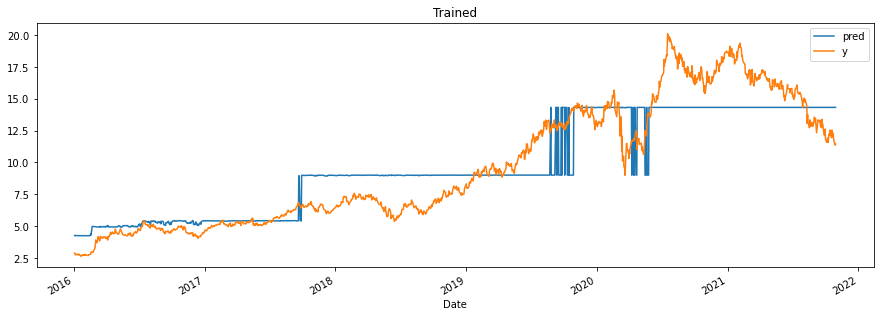

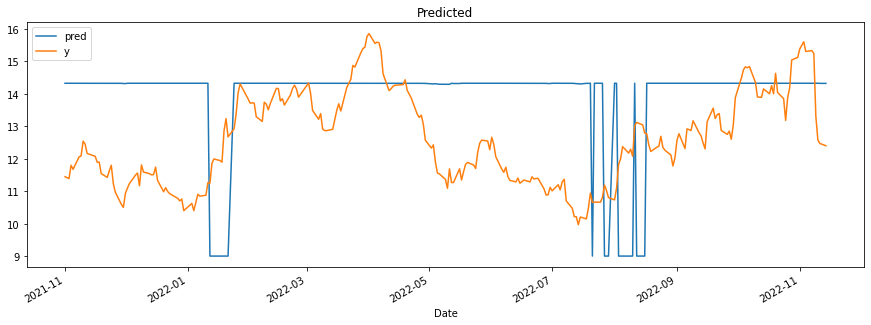

In [67]:
size = train_X.shape[1]
slp =  SingleLayerPerceptron(size, 50, 1, 'sigmoid')
slp.learning_rate = 1e-6
slp.train(X, y)
plot_graphs(slp, train_X, test_X, train_y, test_y)

Época: 1 Erro: 28.05804597452084
Época: 2 Erro: 25.981722514360335
Época: 3 Erro: 24.05904906657517
Época: 4 Erro: 22.16073859166971
Época: 5 Erro: 14.647445817415973
Época: 6 Erro: 9.741062084217493
Época: 7 Erro: 6.295290668386126
Época: 8 Erro: 4.117565498920026
Época: 9 Erro: 2.990574257586847
Época: 10 Erro: 2.20890852405988
Época: 11 Erro: 1.679856740770538
Época: 12 Erro: 1.3228747181439058
Época: 13 Erro: 1.0529744871294566
Época: 14 Erro: 0.8584936818351988
Época: 15 Erro: 0.7153550864208281
Época: 16 Erro: 0.6042684507302111
Época: 17 Erro: 0.5164244721871384
Época: 18 Erro: 0.4452235405303117
Época: 19 Erro: 0.3865974583643317
Época: 20 Erro: 0.3381583195010398
Época: 21 Erro: 0.29826069535737665
Época: 22 Erro: 0.2654637815383719
Época: 23 Erro: 0.23851877007563183
Época: 24 Erro: 0.21637237704523024
Época: 25 Erro: 0.19815091981108854
Época: 26 Erro: 0.18314079518728035
Época: 27 Erro: 0.17076423572788593
Época: 28 Erro: 0.16055402833573051
Época: 29 Erro: 0.15213111607636

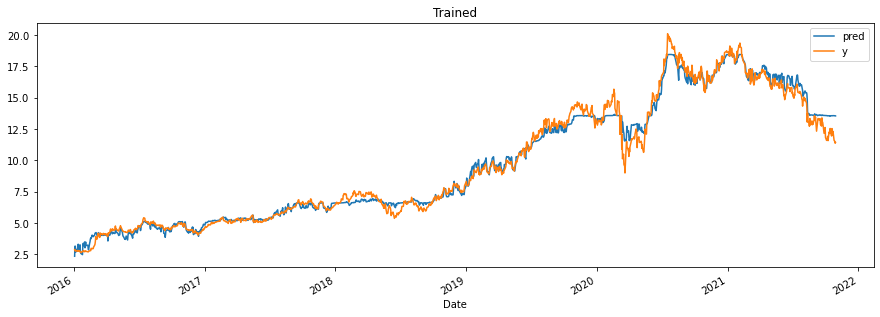

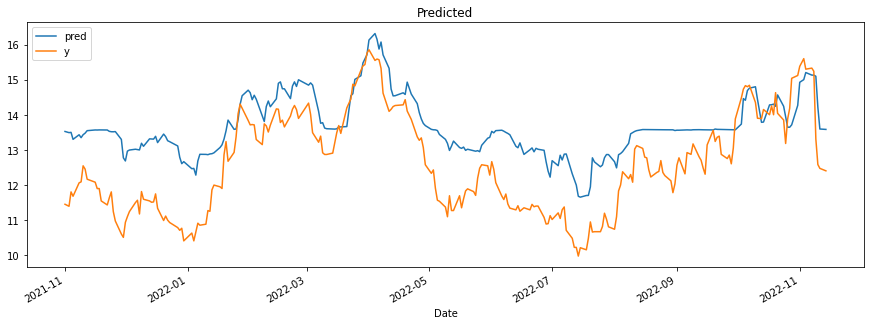

In [69]:
slp =  SingleLayerPerceptron(size, 50, 1, 'sigmoid')
slp.learning_rate = 1e-6
slp.max_iter_num = 20000
slp.min_loss_error = 0.02

slp.train(train_X.to_numpy(), train_y.to_numpy())
plot_graphs(slp, train_X, test_X, train_y, test_y)